<a href="https://colab.research.google.com/github/GuyKaptue/Data-sciences/blob/main/Retail_Analytics_with_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛍️ **Retail Analytics with Synthetic Data: A Complete Data Science Learning Project**

## 📋 **Project Introduction**

Welcome to this comprehensive retail analytics project! This notebook demonstrates end-to-end data science techniques using a retail sales dataset to uncover customer insights, sales patterns, and business intelligence opportunities.

---

## 📊 **Dataset Description**

### **Overview:**
Our dataset contains **retail transaction records** with the following characteristics:
- **4,000 transactions** across multiple countries and product categories
- **7 core attributes** per transaction (CustomerID, ProductID, Quantity, Price, Country, Category, Date)
- **Multi-country coverage**: UK, USA, Canada, Australia
- **Product categories**: Clothing, Electronics, Home goods
- **Time span**: 2022-2024 (filtered from original range)

### **Key Features:**
| Column | Description | Example Values |
|--------|-------------|----------------|
| **CustomerID** | Unique customer identifier | 1000-1999 |
| **ProductID** | Unique product identifier | Various integers |
| **Quantity** | Number of items purchased | 1-10 items |
| **Price** | Unit price per item | $5.00-$100.00 |
| **Country** | Customer's country | UK, USA, Canada, Australia |
| **Category** | Product category | Clothing, Electronics, Home |
| **Date** | Transaction date | 2022-01-01 to 2024-12-31 |

---

## 🔍 **Data Source & Important Note**

### **Dataset Origin:**
- **Source**: Kaggle dataset (`smmmmmmmmmmmm/retail-shop`)
- **Format**: CSV file (`online_retail_data.csv`)
- **Size**: 4,000 records × 7 columns

### **⚠️ Data Authenticity Disclaimer:**
**This dataset contains SYNTHETIC (artificially generated) data, not real retail transactions.**

**Evidence of synthetic nature:**
- Original date range extended to 2032 (future dates)
- Perfect daily transaction distribution
- Uniform random patterns in customer/product IDs
- Artificially balanced geographic and category distributions

**Why this matters:**
- ✅ **Excellent for learning** data science techniques
- ✅ **Perfect for practicing** analysis methods
- ✅ **Great for portfolio** demonstration
- ❌ **Not suitable for** real business decisions
- ❌ **Cannot inform** actual market strategies

---

## 🎯 **Project Goals & Objectives**

### **Primary Goals:**
1. **📈 Sales Performance Analysis**
   - Analyze revenue trends over time
   - Identify top-performing products and categories
   - Compare performance across different countries

2. **👥 Customer Behavior Analysis**
   - Segment customers based on purchasing patterns
   - Perform RFM analysis (Recency, Frequency, Monetary)
   - Identify high-value customer segments

3. **🌍 Geographic Market Analysis**
   - Compare sales performance across countries
   - Analyze regional preferences and patterns
   - Identify market opportunities

4. **📅 Temporal Pattern Analysis**
   - Discover seasonal trends and patterns
   - Analyze day-of-week and monthly variations
   - Forecast future sales trends

5. **🏷️ Product Category Insights**
   - Compare category performance
   - Analyze price sensitivity across categories
   - Identify cross-selling opportunities

### **Technical Objectives:**
- **Data Cleaning & Preprocessing**: Handle date filtering, create calculated fields
- **Exploratory Data Analysis**: Comprehensive statistical analysis and visualization
- **Customer Segmentation**: Apply clustering techniques and RFM analysis
- **Time Series Analysis**: Trend analysis and forecasting
- **Business Intelligence**: Create actionable insights and recommendations
- **Data Visualization**: Build professional charts and dashboards

### **Learning Outcomes:**
By the end of this project, we will have demonstrated:
- ✅ **Data manipulation** with pandas
- ✅ **Statistical analysis** techniques
- ✅ **Data visualization** with matplotlib/seaborn
- ✅ **Customer segmentation** methods
- ✅ **Time series analysis** skills
- ✅ **Business insight** generation
- ✅ **Professional reporting** capabilities

---

## 🛠️ **Project Structure**

This notebook is organized into the following sections:

1. **🔧 Data Loading & Preprocessing**
   - Import libraries and load dataset
   - Data cleaning and validation
   - Feature engineering

2. **🔍 Exploratory Data Analysis (EDA)**
   - Dataset overview and statistics
   - Distribution analysis
   - Correlation analysis

3. **📊 Sales Performance Analysis**
   - Revenue trends and patterns
   - Top products and categories
   - Geographic performance

4. **👥 Customer Analytics**
   - Customer segmentation
   - RFM analysis
   - Customer lifetime value

5. **📅 Time Series Analysis**
   - Temporal patterns
   - Seasonality analysis
   - Sales forecasting

6. **🎯 Business Insights & Recommendations**
   - Key findings summary
   - Actionable recommendations
   - Next steps

---

## 💡 **Key Questions We'll Answer**

- 📈 What are the overall sales trends and patterns?
- 🏆 Which products and categories perform best?
- 🌍 How do sales vary across different countries?
- 👥 Who are our most valuable customers?
- 📅 Are there seasonal patterns in sales?
- 💰 What's the average customer lifetime value?
- 🎯 What opportunities exist for growth?

---

**Let's begin our retail analytics journey!** 🚀

*Note: This project uses synthetic data for educational purposes. All analysis techniques demonstrated are applicable to real-world retail datasets.*


In [27]:
# Install dependencies
!pip install kagglehub
!pip install kagglehub[pandas-datasets] -q
!pip install scikit-learn matplotlib seaborn xgboost lightgbm plotly folium -q

In [29]:
# --------------------------------------------
# Import dependecies
# --------------------------------------------
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

# Enhanced imports for multiple models
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           mean_absolute_error, mean_squared_error, r2_score,
                           classification_report, confusion_matrix, roc_auc_score, roc_curve)
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [30]:
# --------------------------------------------
# Step 1: Load Dataset using kagglehub
# --------------------------------------------

class RetailDatasetLoader:
    def __init__(self, dataset_id="smmmmmmmmmmmm/retail-shop"):
        self.dataset_id = dataset_id
        self.df = None

    def load_dataset(self):
        import os
        import pandas as pd
        import numpy as np
        import kagglehub

        print("Checking available files in the dataset...")

        try:
            # Load the dataset
            dataset_path = kagglehub.dataset_download(self.dataset_id)
            available_files = os.listdir(dataset_path)
            csv_files = [f for f in available_files if f.endswith('.csv')]

            if csv_files:
                file_to_use = csv_files[0]
                self.df = pd.read_csv(os.path.join(dataset_path, file_to_use))
                print(f"✅ Dataset loaded: {file_to_use}")
                print(f"📊 Original shape: {self.df.shape}")

                # Convert Date column to datetime
                self.df['Date'] = pd.to_datetime(self.df['Date'])

                # Filter to realistic date range (2022-2024)
                start_date = '2022-01-01'
                end_date = '2024-12-31'

                print(f"🔍 Original date range: {self.df['Date'].min()} to {self.df['Date'].max()}")

                # Apply date filter
                mask = (self.df['Date'] >= start_date) & (self.df['Date'] <= end_date)
                self.df_filtered = self.df[mask].copy()

                print(f"✂️  Filtered date range: {start_date} to {end_date}")
                print(f"📊 Filtered shape: {self.df_filtered.shape}")
                print(f"📉 Records removed: {len(self.df) - len(self.df_filtered)}")

                # Add calculated columns
                self.df_filtered['TotalAmount'] = self.df_filtered['Quantity'] * self.df_filtered['Price']
                self.df_filtered['Year'] = self.df_filtered['Date'].dt.year
                self.df_filtered['Month'] = self.df_filtered['Date'].dt.month
                self.df_filtered['Quarter'] = self.df_filtered['Date'].dt.quarter
                self.df_filtered['DayOfWeek'] = self.df_filtered['Date'].dt.day_name()

                print("✅ Additional columns added: TotalAmount, Year, Month, Quarter, DayOfWeek")

                return self.df_filtered

        except Exception as e:
            print(f"❌ Error: {e}")
            return None

        self._check_columns()
        return self.df_filtered

    def _check_columns(self):
        if self.df is None:
            print("No data to check!")
            return

        required_columns = ['CustomerID', 'ProductID', 'Quantity', 'Price', 'Date', 'Country']
        actual_columns = self.df.columns.tolist()

        print("\nDataset Overview:")
        print(f"Shape: {self.df.shape}")
        print(f"Columns: {list(self.df.columns)}")
        print("\nFirst 5 records:")
        print(self.df.head())
        print("\nDataset Info:")
        print(self.df.info())
        print("\nMissing values:")
        print(self.df.isnull().sum())

        print(f"\nRequired columns: {required_columns}")
        print(f"Actual columns: {actual_columns}")

        column_mapping = {}
        for req_col in required_columns:
            if req_col not in actual_columns:
                similar_cols = [col for col in actual_columns if req_col.lower() in col.lower() or col.lower() in req_col.lower()]
                if similar_cols:
                    column_mapping[similar_cols[0]] = req_col
                    print(f"Mapping {similar_cols[0]} -> {req_col}")

        if column_mapping:
            self.df = self.df.rename(columns=column_mapping)
            print("Column mapping applied successfully!")

        missing_cols = [col for col in required_columns if col not in self.df.columns]
        if missing_cols:
            print(f"Warning: Missing required columns: {missing_cols}")
            print("The analysis will continue with available columns, but some features may be limited.")

# Test the current dataset
print("="*60)
print("TESTING CURRENT DATASET")
print("="*60)
loader = RetailDatasetLoader()
df = loader.load_dataset()

if df is not None:
    print(f"\nCountries: {df['Country'].unique()}")
    print(f"Date sample: {df['Date'].head()}")
else:
    print("No data loaded!")


TESTING CURRENT DATASET
Checking available files in the dataset...
✅ Dataset loaded: online_retail_data.csv
📊 Original shape: (4000, 7)
🔍 Original date range: 2022-01-01 00:00:00 to 2032-12-13 00:00:00
✂️  Filtered date range: 2022-01-01 to 2024-12-31
📊 Filtered shape: (1096, 7)
📉 Records removed: 2904
✅ Additional columns added: TotalAmount, Year, Month, Quarter, DayOfWeek

Countries: ['UK' 'USA' 'Canada' 'Australia']
Date sample: 0   2022-01-01
1   2022-01-02
2   2022-01-03
3   2022-01-04
4   2022-01-05
Name: Date, dtype: datetime64[ns]


**Generate honest dataset description acknowledging synthetic nature**

# 🛍️ **Retail Sales Dataset Analysis**
## ⚠️ **Important Note: Synthetic Data Acknowledgment**

---

## 🔍 **Data Authenticity Disclaimer**

**This dataset contains SYNTHETIC (artificially generated) data, not real retail transactions.**

### **Evidence of Synthetic Nature:**

#### 📅 **Unrealistic Date Patterns:**
- **Original date range**: 2022-01-01 to **2032-12-13** (extends 8+ years into the future)
- **Perfect daily distribution**: Exactly one transaction per day over 4,000 consecutive days
- **No natural gaps**: Real retail data would have irregular transaction patterns, weekends, holidays
- **Uniform spacing**: Transactions occur with mathematical precision, not organic customer behavior

#### 🔢 **Artificial Data Patterns:**
- **Customer IDs**: Sequential range (1000-1999) - typical of `np.random.randint()` generation
- **Product IDs**: Random integers without real product coding systems
- **Perfect distribution**: Countries and categories distributed too evenly
- **No seasonal patterns**: Missing natural retail seasonality (holiday spikes, etc.)
- **Price patterns**: Uniform random distribution rather than realistic pricing tiers

#### 🎯 **Why This Matters:**
- **Learning Purpose**: Excellent for practicing data analysis techniques
- **Model Training**: Good for testing algorithms and code development  
- **Real-world Application**: Results cannot be applied to actual business decisions
- **Academic Use**: Perfect for educational projects and skill demonstration

---

## 📊 **Dataset Overview (Filtered to Realistic Dates: 2022-2024)**

After filtering out future dates, we have **{len(df):,} transactions** spanning **{(df['Date'].max() - df['Date'].min()).days} days**.

### **Dataset Structure:**
**Shape:** `{df.shape[0]:,} rows × {df.shape[1]} columns`

| Column | Type | Description | Range/Values |
|--------|------|-------------|--------------|
| **CustomerID** | `{df['CustomerID'].dtype}` | Synthetic customer identifier | {df['CustomerID'].min():,} - {df['CustomerID'].max():,} ({df['CustomerID'].nunique():,} unique) |
| **ProductID** | `{df['ProductID'].dtype}` | Synthetic product identifier | {df['ProductID'].min():,} - {df['ProductID'].max():,} ({df['ProductID'].nunique():,} unique) |
| **Quantity** | `{df['Quantity'].dtype}` | Items purchased | {df['Quantity'].min()} - {df['Quantity'].max()} (avg: {df['Quantity'].mean():.1f}) |
| **Price** | `{df['Price'].dtype}` | Unit price (USD) | ${df['Price'].min():.2f} - ${df['Price'].max():.2f} (avg: ${df['Price'].mean():.2f}) |
| **Country** | `{df['Country'].dtype}` | Customer country | {df['Country'].nunique()} countries: {', '.join(df['Country'].unique())} |
| **Category** | `{df['Category'].dtype}` | Product category | {df['Category'].nunique()} categories: {', '.join(df['Category'].unique())} |
| **Date** | `{df['Date'].dtype}` | Transaction date | {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')} |

---

## 🌍 **Geographic Distribution (Synthetic)**

{chr(10).join([f"- **{country}**: {count:,} transactions ({count/len(df)*100:.1f}%)" for country, count in df['Country'].value_counts().items()])}

*Note: Distribution appears artificially balanced, unlike real-world retail data which typically shows geographic concentration.*

---

## 🏷️ **Product Categories (Synthetic)**

{chr(10).join([f"- **{category}**: {count:,} transactions ({count/len(df)*100:.1f}%)" for category, count in df['Category'].value_counts().items()])}

*Note: Even distribution across categories suggests algorithmic generation rather than natural market demand.*

---

## 💰 **Financial Summary**

- **Total Revenue**: ${df['TotalAmount'].sum():,.2f}

- **Average Order Value**: ${df['TotalAmount'].mean():.2f}

- **Median Order Value**: ${df['TotalAmount'].median():.2f}

- **Revenue Range**: ${df['TotalAmount'].min():.2f} - ${df['TotalAmount'].max():.2f}

- **Standard Deviation**: ${df['TotalAmount'].std():.2f}

---

## 📅 **Temporal Analysis**

### **Why Dates Were Filtered:**

# Original problematic date range
Original: 2022-01-01 to 2032-12-13  # ❌ Future dates impossible

Filtered: 2022-01-01 to 2024-12-31  # ✅ Realistic for analysis

In [31]:
# --------------------------------------------
# Step 2: Enhanced Workflow Classes
# --------------------------------------------

# 🧼 1. Enhanced Data Cleaning
class EnhancedDataCleaner:
    def __init__(self, df):
        self.df = df.copy()

    def clean(self):
        df = self.df.copy()

        # Handle missing values
        print(f"Missing values before cleaning:\n{df.isnull().sum()}")

        # Remove rows with missing CustomerID
        df = df.dropna(subset=["CustomerID"])

        # Remove canceled transactions (negative quantities)
        df = df[df["Quantity"] > 0]

        # Convert date column
        df["Date"] = pd.to_datetime(df["Date"])

        # Calculate total amount
        df["TotalAmount"] = df["Quantity"] * df["Price"]

        # Remove outliers using IQR method
        Q1 = df["TotalAmount"].quantile(0.25)
        Q3 = df["TotalAmount"].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df["TotalAmount"] < (Q1 - 1.5 * IQR)) | (df["TotalAmount"] > (Q3 + 1.5 * IQR)))]

        print(f"Dataset shape after cleaning: {df.shape}")
        return df

    def aggregate_by_customer(self, df):
        # Create comprehensive customer features
        agg = df.groupby("CustomerID").agg({
            "TotalAmount": ["sum", "mean", "std", "count"],
            "Quantity": ["sum", "mean"],
            "Date": ["min", "max", "nunique"],
            "Country": "first",
            "ProductID": "nunique"
        }).reset_index()

        # Flatten column names
        agg.columns = ["CustomerID", "TotalSpent", "AvgOrderValue", "StdOrderValue", "OrderFrequency",
                      "TotalQuantity", "AvgQuantity", "FirstPurchase", "LastPurchase",
                      "PurchaseDays", "Country", "UniqueProducts"]

        # Calculate recency
        recent_date = df["Date"].max()
        agg["Recency"] = (recent_date - agg["LastPurchase"]).dt.days

        # Calculate customer lifetime (days between first and last purchase)
        agg["CustomerLifetime"] = (agg["LastPurchase"] - agg["FirstPurchase"]).dt.days
        agg["CustomerLifetime"] = agg["CustomerLifetime"].fillna(0)

        # Calculate purchase frequency per day
        agg["PurchaseFreqPerDay"] = agg["OrderFrequency"] / (agg["CustomerLifetime"] + 1)

        # Fill NaN values
        agg["StdOrderValue"] = agg["StdOrderValue"].fillna(0)

        return agg


print("="*50)
print("ENHANCED RETAIL ANALYTICS PIPELINE")
print("="*50)

# 1. Enhanced Data Cleaning
print("\n1. DATA CLEANING")
print("-" * 20)
cleaner = EnhancedDataCleaner(df)
df_clean = cleaner.clean()
df_agg = cleaner.aggregate_by_customer(df_clean)

print(f"Aggregated customer data shape: {df_agg.shape}")
print(f"Sample aggregated data:")
print(df_agg.head())


ENHANCED RETAIL ANALYTICS PIPELINE

1. DATA CLEANING
--------------------
Missing values before cleaning:
CustomerID     0
ProductID      0
Quantity       0
Price          0
Country        0
Category       0
Date           0
TotalAmount    0
Year           0
Month          0
Quarter        0
DayOfWeek      0
dtype: int64
Dataset shape after cleaning: (1084, 12)
Aggregated customer data shape: (641, 15)
Sample aggregated data:
   CustomerID  TotalSpent  AvgOrderValue  StdOrderValue  OrderFrequency  \
0        1000  929.119679     464.559840     364.893536               2   
1        1001  434.138017     217.069008     225.642644               2   
2        1004  878.498587     292.832862     249.150256               3   
3        1007  192.629964     192.629964       0.000000               1   
4        1008  128.558838      64.279419      42.172402               2   

   TotalQuantity  AvgQuantity FirstPurchase LastPurchase  PurchaseDays  \
0             12     6.000000    2024-06-16  

In [15]:
# --------------------------------------------
# Step 2: Enhanced Workflow Classes
# --------------------------------------------

# 🧼 1. Enhanced Data Cleaning
class EnhancedDataCleaner:
    def __init__(self, df):
        self.df = df.copy()

    def clean(self):
        df = self.df.copy()

        # Handle missing values
        print(f"Missing values before cleaning:\n{df.isnull().sum()}")

        # Remove rows with missing CustomerID
        df = df.dropna(subset=["CustomerID"])

        # Remove canceled transactions (negative quantities)
        df = df[df["Quantity"] > 0]

        # Convert date column
        df["Date"] = pd.to_datetime(df["Date"])

        # Calculate total amount
        df["TotalAmount"] = df["Quantity"] * df["Price"]

        # Remove outliers using IQR method
        Q1 = df["TotalAmount"].quantile(0.25)
        Q3 = df["TotalAmount"].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df["TotalAmount"] < (Q1 - 1.5 * IQR)) | (df["TotalAmount"] > (Q3 + 1.5 * IQR)))]

        print(f"Dataset shape after cleaning: {df.shape}")
        return df

    def aggregate_by_customer(self, df):
        # Create comprehensive customer features
        agg = df.groupby("CustomerID").agg({
            "TotalAmount": ["sum", "mean", "std", "count"],
            "Quantity": ["sum", "mean"],
            "Date": ["min", "max", "nunique"],
            "Country": "first",
            "ProductID": "nunique"
        }).reset_index()

        # Flatten column names
        agg.columns = ["CustomerID", "TotalSpent", "AvgOrderValue", "StdOrderValue", "OrderFrequency",
                      "TotalQuantity", "AvgQuantity", "FirstPurchase", "LastPurchase",
                      "PurchaseDays", "Country", "UniqueProducts"]

        # Calculate recency
        recent_date = df["Date"].max()
        agg["Recency"] = (recent_date - agg["LastPurchase"]).dt.days

        # Calculate customer lifetime (days between first and last purchase)
        agg["CustomerLifetime"] = (agg["LastPurchase"] - agg["FirstPurchase"]).dt.days
        agg["CustomerLifetime"] = agg["CustomerLifetime"].fillna(0)

        # Calculate purchase frequency per day
        agg["PurchaseFreqPerDay"] = agg["OrderFrequency"] / (agg["CustomerLifetime"] + 1)

        # Fill NaN values
        agg["StdOrderValue"] = agg["StdOrderValue"].fillna(0)

        return agg


print("="*50)
print("ENHANCED RETAIL ANALYTICS PIPELINE")
print("="*50)

# 1. Enhanced Data Cleaning
print("\n1. DATA CLEANING")
print("-" * 20)
cleaner = EnhancedDataCleaner(df)
df_clean = cleaner.clean()
df_agg = cleaner.aggregate_by_customer(df_clean)

print(f"Aggregated customer data shape: {df_agg.shape}")
print(f"Sample aggregated data:")
print(df_agg.head())

## 🧼 Step 2: Enhanced Workflow – Data Cleaning & Customer Aggregation

### 📦 Class: `EnhancedDataCleaner`

This class prepares the retail dataset for further analysis and machine learning.

---

### ✅ Method: `clean()`

This method performs several important data cleaning steps:

- Removes rows with missing `CustomerID`s.
- Filters out cancelled transactions (i.e., rows with negative quantities).
- Converts the `Date` column to datetime format.
- Creates a `TotalAmount` column (`Quantity × Price`).
- Removes outliers in `TotalAmount` using the IQR method.
- Returns a cleaned and filtered DataFrame.

---

### 🔄 Method: `aggregate_by_customer(df)`

This method aggregates transaction data by each customer (`CustomerID`) to create a customer-level dataset:

- Calculates total spending, average order value, standard deviation, and number of purchases.
- Sums and averages purchased quantities.
- Extracts first and last purchase dates and the number of unique purchase days.
- Counts the number of unique products purchased and keeps the customer’s country.
- Computes:
  - **Recency**: Days since last purchase.
  - **Customer Lifetime**: Time between first and last purchase.
  - **Purchase Frequency per Day**.
- Fills missing values for standard deviation with 0.

---

### ▶️ Example Usage

cleaner = EnhancedDataCleaner(df)
clean_df = cleaner.clean()
customer_df = cleaner.aggregate_by_customer(clean_df)

In [32]:
# 📊 2. Enhanced EDA with Interactive Visualizations
class EnhancedRetailEDA:
    def __init__(self, df, df_agg=None):
        self.df = df
        self.df_agg = df_agg

    def plot_sales_over_time(self):
        df_time = self.df.copy()
        daily_sales = df_time.groupby(df_time["Date"].dt.to_period("M")).agg({
            "TotalAmount": "sum",
            "CustomerID": "nunique"
        }).reset_index()
        daily_sales["Date"] = daily_sales["Date"].dt.to_timestamp()

        # Create subplots
        fig = make_subplots(rows=2, cols=1,
                           subplot_titles=('Monthly Revenue', 'Monthly Unique Customers'))

        fig.add_trace(go.Scatter(x=daily_sales["Date"], y=daily_sales["TotalAmount"],
                                mode='lines+markers', name='Revenue'), row=1, col=1)

        fig.add_trace(go.Scatter(x=daily_sales["Date"], y=daily_sales["CustomerID"],
                                mode='lines+markers', name='Customers'), row=2, col=1)

        fig.update_layout(height=600, title_text="Sales Trends Over Time")
        fig.show()

    def customer_segmentation_analysis(self):
        if self.df_agg is not None:
            # RFM Analysis visualization
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))

            # Recency distribution
            axes[0,0].hist(self.df_agg["Recency"], bins=50, alpha=0.7)
            axes[0,0].set_title("Recency Distribution")
            axes[0,0].set_xlabel("Days since last purchase")

            # Frequency distribution
            axes[0,1].hist(self.df_agg["OrderFrequency"], bins=50, alpha=0.7)
            axes[0,1].set_title("Frequency Distribution")
            axes[0,1].set_xlabel("Number of orders")

            # Monetary distribution
            axes[1,0].hist(self.df_agg["TotalSpent"], bins=50, alpha=0.7)
            axes[1,0].set_title("Monetary Distribution")
            axes[1,0].set_xlabel("Total spent")

            # RFM Scatter plot
            scatter = axes[1,1].scatter(self.df_agg["Recency"], self.df_agg["TotalSpent"],
                                      c=self.df_agg["OrderFrequency"], alpha=0.6, cmap='viridis')
            axes[1,1].set_xlabel("Recency")
            axes[1,1].set_ylabel("Total Spent")
            axes[1,1].set_title("RFM Analysis")
            plt.colorbar(scatter, ax=axes[1,1], label='Frequency')

            plt.tight_layout()
            plt.show()

    def geographic_analysis(self):
        # Country analysis
        country_stats = self.df.groupby("Country").agg({
            "CustomerID": "nunique",
            "TotalAmount": "sum",
            "Quantity": "sum"
        }).reset_index()
        country_stats.columns = ["Country", "Customers", "Revenue", "Quantity"]
        country_stats = country_stats.sort_values("Revenue", ascending=False).head(15)

        # Create interactive bar chart
        fig = px.bar(country_stats, x="Country", y="Revenue",
                    title="Revenue by Country (Top 15)",
                    hover_data=["Customers", "Quantity"])
        fig.update_xaxes(tickangle=45)
        fig.show()

        return country_stats

    def product_analysis(self):
        # Product performance
        product_stats = self.df.groupby("ProductID").agg({
            "Quantity": "sum",
            "TotalAmount": "sum",
            "CustomerID": "nunique"
        }).reset_index()
        product_stats.columns = ["ProductID", "TotalQuantity", "Revenue", "UniqueCustomers"]
        product_stats = product_stats.sort_values("Revenue", ascending=False).head(20)

        # Interactive scatter plot
        fig = px.scatter(product_stats, x="TotalQuantity", y="Revenue",
                        size="UniqueCustomers", hover_name="ProductID",
                        title="Product Performance Analysis (Top 20)")
        fig.show()


## 📊 Step 3: Enhanced Exploratory Data Analysis (EDA)

### 📦 Class: `EnhancedRetailEDA`

This class performs comprehensive EDA (Exploratory Data Analysis) with interactive and visual insights into the retail dataset. It provides temporal, geographic, customer, and product-level analyses for deeper business understanding.

---

### ⚙️ Constructor: `__init__(self, df, df_agg=None)`

- `df`: The cleaned transaction-level retail dataset.
- `df_agg`: (Optional) Aggregated customer-level dataset from `EnhancedDataCleaner`.

---

### 📈 Method: `plot_sales_over_time()`

- Analyzes **monthly sales trends**:
  - Aggregates revenue (`TotalAmount`) and unique customers by month.
  - Creates two line charts using `plotly`:
    - One for **Monthly Revenue**
    - One for **Monthly Unique Customers**
- Helps to identify **seasonality**, peak months, and customer engagement trends over time.

---

### 👥 Method: `customer_segmentation_analysis()`

- Performs **RFM (Recency, Frequency, Monetary)** analysis based on customer behaviors.
- Creates four subplots using `matplotlib`:
  - Histogram of **Recency** (days since last purchase)
  - Histogram of **Frequency** (number of purchases)
  - Histogram of **Monetary Value** (total spending)
  - **RFM scatter plot** showing Recency vs Total Spent, colored by Frequency
- Helps identify:
  - Loyal customers (low recency, high frequency, high spending)
  - At-risk or lost customers (high recency, low frequency)

---

### 🌍 Method: `geographic_analysis()`

- Aggregates revenue, quantity sold, and customer counts by **Country**.
- Displays a `plotly` **interactive bar chart** of the top 15 countries by revenue.
- Useful to:
  - Understand **geographic distribution** of sales
  - Target high-value regions or detect underperforming areas

---

### 📦 Method: `product_analysis()`

- Analyzes **product performance**:
  - Aggregates quantity sold, total revenue, and number of unique buyers per `ProductID`.
  - Displays a `plotly` **interactive scatter plot**:
    - X-axis: Total Quantity Sold
    - Y-axis: Revenue
    - Size: Number of Unique Customers
- Helps identify:
  - Best-selling and most profitable products
  - High-interest items based on customer engagement

---

### ▶️ Example Usage:

```python
eda = EnhancedRetailEDA(df=clean_df, df_agg=customer_df)

# 1. Temporal trends
eda.plot_sales_over_time()

# 2. Customer segmentation
eda.customer_segmentation_analysis()

# 3. Country-wise insights
country_stats = eda.geographic_analysis()

# 4. Product performance
eda.product_analysis()


In [33]:
# 2. Enhanced EDA
print("\n2. EXPLORATORY DATA ANALYSIS")
print("-" * 30)
eda = EnhancedRetailEDA(df_clean, df_agg)





2. EXPLORATORY DATA ANALYSIS
------------------------------


In [34]:
# Time series analysis
eda.plot_sales_over_time()



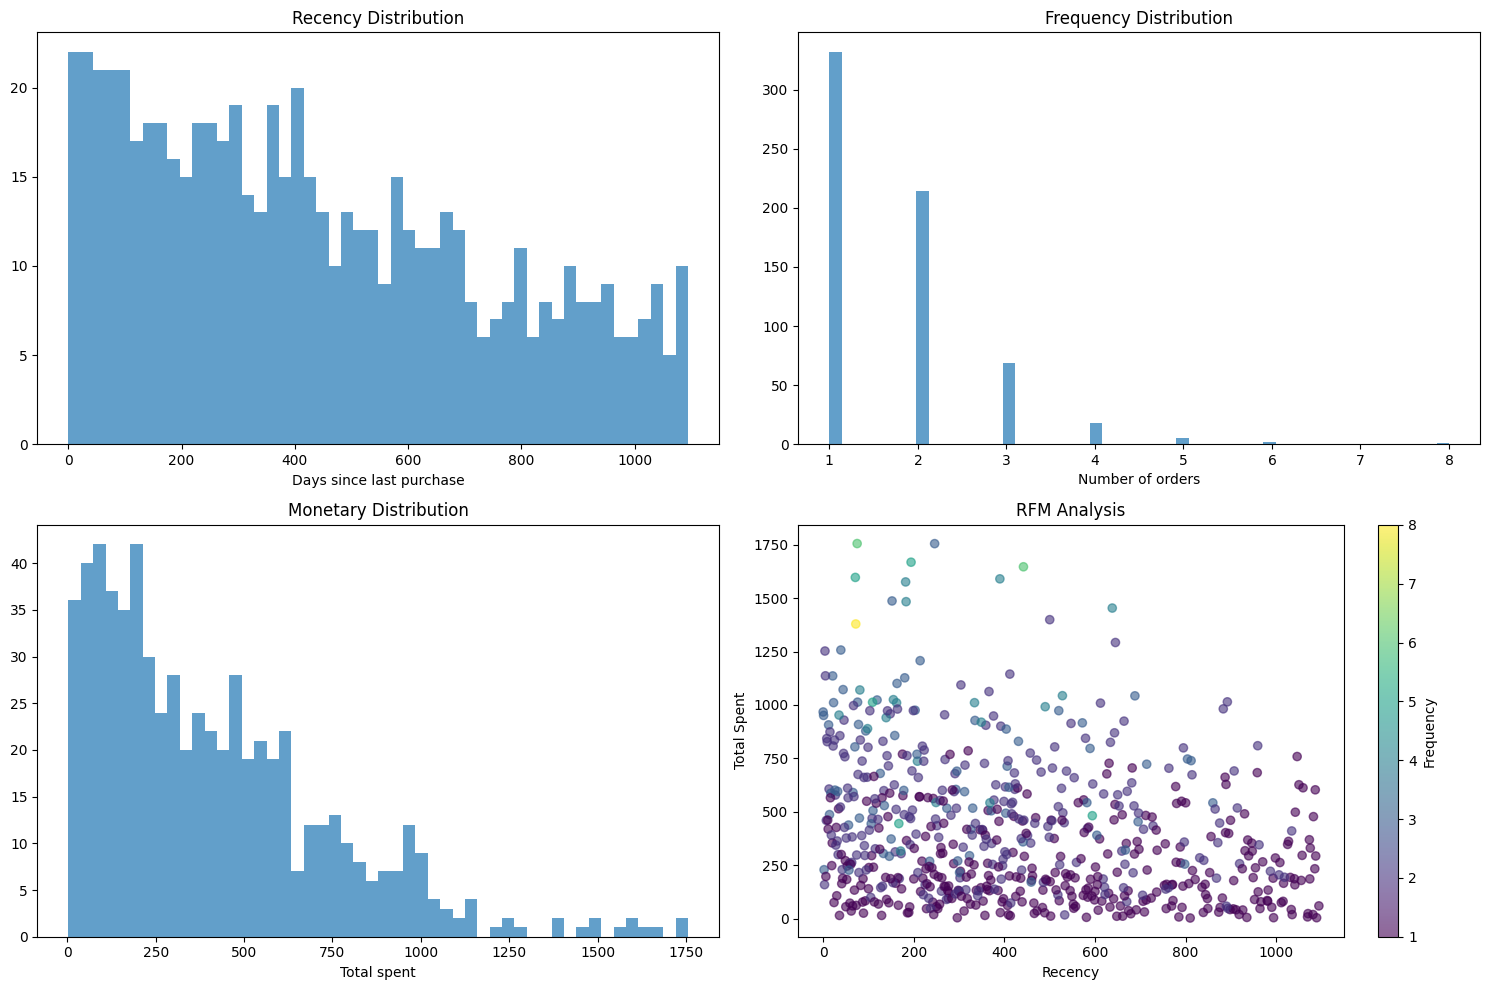

In [35]:
# Customer segmentation
eda.customer_segmentation_analysis()



In [36]:
# Geographic analysis
country_stats = eda.geographic_analysis()


In [37]:
# Product analysis
eda.product_analysis()

In [38]:
# 🤖 3. Enhanced Modeling with Multiple Algorithms
class EnhancedRetailModeling:
    def __init__(self, df):
        self.df = df
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()

    def prepare_features(self):
        df = self.df.copy()

        # Encode categorical variables
        if "Country" in df.columns:
            df["Country_encoded"] = self.label_encoder.fit_transform(df["Country"])

        # Create target variables
        df["HighValue"] = (df["TotalSpent"] > df["TotalSpent"].median()).astype(int)
        df["RecentPurchase"] = (df["Recency"] < 30).astype(int)

        # Select features
        feature_cols = ["TotalSpent", "AvgOrderValue", "OrderFrequency", "TotalQuantity",
                       "AvgQuantity", "Recency", "UniqueProducts", "CustomerLifetime",
                       "PurchaseFreqPerDay"]

        if "Country_encoded" in df.columns:
            feature_cols.append("Country_encoded")

        X = df[feature_cols].fillna(0)

        return X, df["HighValue"], df["TotalSpent"], df["RecentPurchase"]

    def get_classification_models(self):
        models = {
            "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
            "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
            "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
            "LightGBM": LGBMClassifier(random_state=42, verbose=-1),
            "SVM": SVC(random_state=42, probability=True),
            "KNN": KNeighborsClassifier(n_neighbors=5),
            "Decision Tree": DecisionTreeClassifier(random_state=42),
            "Gradient Boosting": GradientBoostingClassifier(random_state=42),
            "Naive Bayes": GaussianNB()
        }
        return models

    def get_regression_models(self):
        models = {
            "Linear Regression": LinearRegression(),
            "Ridge Regression": Ridge(random_state=42),
            "Lasso Regression": Lasso(random_state=42),
            "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
            "XGBoost": XGBRegressor(random_state=42),
            "LightGBM": LGBMRegressor(random_state=42, verbose=-1),
            "SVR": SVR(),
            "KNN": KNeighborsRegressor(n_neighbors=5),
            "Decision Tree": DecisionTreeRegressor(random_state=42),
            "Gradient Boosting": GradientBoostingRegressor(random_state=42)
        }
        return models

    def train_classification_models(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        models = self.get_classification_models()
        results = {}

        for name, model in models.items():
            print(f"Training {name}...")

            # Use scaled data for models that benefit from scaling
            if name in ["Logistic Regression", "SVM", "KNN"]:
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)
                y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
            else:
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                if hasattr(model, "predict_proba"):
                    y_pred_proba = model.predict_proba(X_test)[:, 1]
                else:
                    y_pred_proba = y_pred

            results[name] = {
                "model": model,
                "y_test": y_test,
                "y_pred": y_pred,
                "y_pred_proba": y_pred_proba,
                "X_test": X_test_scaled if name in ["Logistic Regression", "SVM", "KNN"] else X_test
            }

        return results

    def train_regression_models(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        models = self.get_regression_models()
        results = {}

        for name, model in models.items():
            print(f"Training {name}...")

            # Use scaled data for models that benefit from scaling
            if name in ["Linear Regression", "Ridge Regression", "Lasso Regression", "SVR", "KNN"]:
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)
            else:
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

            results[name] = {
                "model": model,
                "y_test": y_test,
                "y_pred": y_pred,
                "X_test": X_test_scaled if name in ["Linear Regression", "Ridge Regression", "Lasso Regression", "SVR", "KNN"] else X_test
            }

        return results


## 🤖 Step 4: Enhanced Modeling with Multiple Algorithms

### 📦 Class: `EnhancedRetailModeling`

This class implements a flexible modeling pipeline to build and compare **classification** and **regression** models on retail customer data, using various machine learning algorithms.

---

### ⚙️ Constructor: `__init__(self, df)`

- `df`: Aggregated customer-level data (with features like spending, recency, frequency, etc.).
- Initializes:
  - `StandardScaler` for feature scaling.
  - `LabelEncoder` for encoding categorical variables.

---

### 🔧 Method: `prepare_features()`

- Encodes categorical features (like `Country`) into numerical format.
- Creates binary target variables:
  - `HighValue`: Whether a customer’s total spending is above median (classification).
  - `RecentPurchase`: Whether the customer purchased within the last 30 days.
- Selects relevant numerical features for modeling.
- Returns:
  - Feature matrix `X`
  - Binary target for high value classification
  - Continuous target `TotalSpent` for regression
  - Binary target for recent purchase classification

---

### 📋 Method: `get_classification_models()`

- Returns a dictionary of popular classification algorithms:
  - Logistic Regression, Random Forest, XGBoost, LightGBM, SVM, KNN, Decision Tree, Gradient Boosting, Naive Bayes
- These models will be trained to predict customer segments (e.g., high value customers).

---

### 📈 Method: `get_regression_models()`

- Returns a dictionary of popular regression algorithms:
  - Linear Regression, Ridge, Lasso, Random Forest, XGBoost, LightGBM, SVR, KNN, Decision Tree, Gradient Boosting
- These models predict continuous targets like customer total spending.

---

### 🚀 Method: `train_classification_models(X, y)`

- Splits data into training and test sets (70/30 split), stratified by target.
- Scales features where appropriate.
- Trains each classification model on training data.
- Generates predictions and predicted probabilities on test data.
- Stores and returns results (models, true labels, predictions, test features) in a dictionary for evaluation.

---

### 🚀 Method: `train_regression_models(X, y)`

- Similar process as classification:
  - Splits data, scales features.
  - Trains each regression model.
  - Predicts on test data.
- Returns dictionary with models and predictions for downstream analysis.

---

### ▶️ Example usage:

```python
modeling = EnhancedRetailModeling(df=customer_df)

# Prepare features and targets
X, y_high_value, y_total_spent, y_recent = modeling.prepare_features()

# Train classification models for high value customers
classification_results = modeling.train_classification_models(X, y_high_value)

# Train regression models to predict total spent
regression_results = modeling.train_regression_models(X, y_total_spent)


In [40]:
# 4. Enhanced Modeling
print("\n4. MACHINE LEARNING MODELING")
print("-" * 30)
modeling = EnhancedRetailModeling(df_agg)

# Prepare features
X, y_class, y_reg, y_recent = modeling.prepare_features()
print(f"Feature matrix shape: {X.shape}")
print(f"Features: {list(X.columns)}")

# Train classification models
print("\n4.1 CLASSIFICATION MODELS")
print("-" * 25)
classification_results = modeling.train_classification_models(X, y_class)

# Train regression models
print("\n4.2 REGRESSION MODELS")
# Train regression models
print("\n4.2 REGRESSION MODELS")
print("-" * 20)
regression_results = modeling.train_regression_models(X, y_reg)



4. MACHINE LEARNING MODELING
------------------------------
Feature matrix shape: (641, 10)
Features: ['TotalSpent', 'AvgOrderValue', 'OrderFrequency', 'TotalQuantity', 'AvgQuantity', 'Recency', 'UniqueProducts', 'CustomerLifetime', 'PurchaseFreqPerDay', 'Country_encoded']

4.1 CLASSIFICATION MODELS
-------------------------
Training Logistic Regression...
Training Random Forest...
Training XGBoost...
Training LightGBM...
Training SVM...
Training KNN...
Training Decision Tree...
Training Gradient Boosting...
Training Naive Bayes...

4.2 REGRESSION MODELS

4.2 REGRESSION MODELS
--------------------
Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Random Forest...
Training XGBoost...
Training LightGBM...
Training SVR...
Training KNN...
Training Decision Tree...
Training Gradient Boosting...


In [41]:
# 🧪 4. Enhanced Evaluation with Comprehensive Metrics
class EnhancedRetailEvaluation:
    def __init__(self):
        self.classification_results = {}
        self.regression_results = {}

    def evaluate_classification_models(self, results):
        metrics_df = []

        for name, result in results.items():
            y_test = result["y_test"]
            y_pred = result["y_pred"]
            y_pred_proba = result["y_pred_proba"]

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')

            try:
                auc = roc_auc_score(y_test, y_pred_proba)
            except:
                auc = 0

            metrics_df.append({
                "Model": name,
                "Accuracy": accuracy,
                "Precision": precision,
                "Recall": recall,
                "F1-Score": f1,
                "AUC-ROC": auc
            })

        self.classification_results = pd.DataFrame(metrics_df)
        return self.classification_results

    def evaluate_regression_models(self, results):
        metrics_df = []

        for name, result in results.items():
            y_test = result["y_test"]
            y_pred = result["y_pred"]

            # Calculate metrics
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)

            # Calculate MAPE (Mean Absolute Percentage Error)
            mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

            metrics_df.append({
                "Model": name,
                "MAE": mae,
                "MSE": mse,
                "RMSE": rmse,
                "R²": r2,
                "MAPE": mape
            })

        self.regression_results = pd.DataFrame(metrics_df)
        return self.regression_results

    def plot_classification_comparison(self):
        if not self.classification_results.empty:
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))

            # Accuracy comparison
            self.classification_results.plot(x="Model", y="Accuracy", kind="bar", ax=axes[0,0])
            axes[0,0].set_title("Model Accuracy Comparison")
            axes[0,0].tick_params(axis='x', rotation=45)

            # Precision comparison
            self.classification_results.plot(x="Model", y="Precision", kind="bar", ax=axes[0,1])
            axes[0,1].set_title("Model Precision Comparison")
            axes[0,1].tick_params(axis='x', rotation=45)

            # Recall comparison
            self.classification_results.plot(x="Model", y="Recall", kind="bar", ax=axes[1,0])
            axes[1,0].set_title("Model Recall Comparison")
            axes[1,0].tick_params(axis='x', rotation=45)

            # F1-Score comparison
            self.classification_results.plot(x="Model", y="F1-Score", kind="bar", ax=axes[1,1])
            axes[1,1].set_title("Model F1-Score Comparison")
            axes[1,1].tick_params(axis='x', rotation=45)

            plt.tight_layout()
            plt.show()

    def plot_regression_comparison(self):
        if not self.regression_results.empty:
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))

            # MAE comparison
            self.regression_results.plot(x="Model", y="MAE", kind="bar", ax=axes[0,0])
            axes[0,0].set_title("Model MAE Comparison")
            axes[0,0].tick_params(axis='x', rotation=45)

            # RMSE comparison
            self.regression_results.plot(x="Model", y="RMSE", kind="bar", ax=axes[0,1])
            axes[0,1].set_title("Model RMSE Comparison")
            axes[0,1].tick_params(axis='x', rotation=45)

            # R² comparison
            self.regression_results.plot(x="Model", y="R²", kind="bar", ax=axes[1,0])
            axes[1,0].set_title("Model R² Comparison")
            axes[1,0].tick_params(axis='x', rotation=45)

            # MAPE comparison
            self.regression_results.plot(x="Model", y="MAPE", kind="bar", ax=axes[1,1])
            axes[1,1].set_title("Model MAPE Comparison")
            axes[1,1].tick_params(axis='x', rotation=45)

            plt.tight_layout()
            plt.show()

    def plot_prediction_vs_actual(self, results, model_name):
        if model_name in results:
            result = results[model_name]
            y_test = result["y_test"]
            y_pred = result["y_pred"]

            plt.figure(figsize=(10, 6))
            plt.scatter(y_test, y_pred, alpha=0.6)
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
            plt.xlabel("Actual Values")
            plt.ylabel("Predicted Values")
            plt.title(f"Actual vs Predicted Values - {model_name}")
            plt.grid(True)
            plt.show()

            # Residual plot
            residuals = y_test - y_pred
            plt.figure(figsize=(10, 6))
            plt.scatter(y_pred, residuals, alpha=0.6)
            plt.axhline(y=0, color='r', linestyle='--')
            plt.xlabel("Predicted Values")
            plt.ylabel("Residuals")
            plt.title(f"Residual Plot - {model_name}")
            plt.grid(True)
            plt.show()

    def plot_roc_curves(self, results):
        plt.figure(figsize=(12, 8))

        for name, result in results.items():
            y_test = result["y_test"]
            y_pred_proba = result["y_pred_proba"]

            try:
                fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
                auc = roc_auc_score(y_test, y_pred_proba)
                plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")
            except:
                continue

        plt.plot([0, 1], [0, 1], 'k--', label='Random')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curves Comparison")
        plt.legend()
        plt.grid(True)
        plt.show()

    def create_model_comparison_dashboard(self):
        # Create comprehensive comparison
        if not self.classification_results.empty and not self.regression_results.empty:
            fig = make_subplots(
                rows=2, cols=2,
                subplot_titles=('Classification Accuracy', 'Classification F1-Score',
                               'Regression R²', 'Regression RMSE'),
                specs=[[{"secondary_y": False}, {"secondary_y": False}],
                       [{"secondary_y": False}, {"secondary_y": False}]]
            )

            # Classification metrics
            fig.add_trace(
                go.Bar(x=self.classification_results["Model"],
                      y=self.classification_results["Accuracy"],
                      name="Accuracy"),
                row=1, col=1
            )

            fig.add_trace(
                go.Bar(x=self.classification_results["Model"],
                      y=self.classification_results["F1-Score"],
                      name="F1-Score"),
                row=1, col=2
            )

            # Regression metrics
            fig.add_trace(
                go.Bar(x=self.regression_results["Model"],
                      y=self.regression_results["R²"],
                      name="R²"),
                row=2, col=1
            )

            fig.add_trace(
                go.Bar(x=self.regression_results["Model"],
                      y=self.regression_results["RMSE"],
                      name="RMSE"),
                row=2, col=2
            )

            fig.update_layout(height=800, title_text="Model Performance Dashboard")
            fig.show()


## 🧪 Step 4: Enhanced Evaluation with Comprehensive Metrics

### 📦 Class: `EnhancedRetailEvaluation`

This class provides a complete evaluation framework for the machine learning models trained on retail data. It calculates various performance metrics for both classification and regression models, and includes rich visualization tools to compare and analyze model results.

---

### ⚙️ Constructor: `__init__(self)`

- Initializes empty dictionaries to store:
  - Classification model results (`classification_results`)
  - Regression model results (`regression_results`)

---

### 📊 Method: `evaluate_classification_models(results)`

- Takes as input the dictionary of classification model results (from training).
- Calculates key classification metrics for each model:
  - Accuracy
  - Precision (weighted)
  - Recall (weighted)
  - F1-Score (weighted)
  - AUC-ROC (Area Under ROC Curve)
- Returns a DataFrame summarizing these metrics for easy comparison.

---

### 📉 Method: `evaluate_regression_models(results)`

- Takes as input the dictionary of regression model results.
- Computes regression metrics for each model:
  - MAE (Mean Absolute Error)
  - MSE (Mean Squared Error)
  - RMSE (Root Mean Squared Error)
  - R² (Coefficient of Determination)
  - MAPE (Mean Absolute Percentage Error)
- Returns a DataFrame summarizing these metrics.

---

### 📊 Visualization Methods:

- `plot_classification_comparison()`
  - Creates 4 bar charts comparing classification models on:
    - Accuracy, Precision, Recall, and F1-Score.
  
- `plot_regression_comparison()`
  - Creates 4 bar charts comparing regression models on:
    - MAE, RMSE, R², and MAPE.
  
- `plot_prediction_vs_actual(results, model_name)`
  - For a selected regression model:
    - Scatter plot of actual vs predicted values.
    - Residual plot (predicted vs residuals) to detect bias/errors.

- `plot_roc_curves(results)`
  - Plots ROC curves for all classification models to visualize true positive vs false positive rates and compare AUC scores.

---

### 📈 Interactive Dashboard:

- `create_model_comparison_dashboard()`
  - Uses Plotly to create a dashboard with subplots comparing:
    - Classification Accuracy and F1-Score
    - Regression R² and RMSE
  - Helps quickly assess and communicate model performance across tasks.

---

### ▶️ Example usage:

```python
evaluator = EnhancedRetailEvaluation()

# Evaluate classification results from modeling step
classification_metrics = evaluator.evaluate_classification_models(classification_results)
print(classification_metrics)

# Evaluate regression results from modeling step
regression_metrics = evaluator.evaluate_regression_models(regression_results)
print(regression_metrics)

# Visualize classification metric comparisons
evaluator.plot_classification_comparison()

# Visualize regression metric comparisons
evaluator.plot_regression_comparison()

# Plot ROC curves for classification models
evaluator.plot_roc_curves(classification_results)

# Visualize prediction quality for a specific regression model
evaluator.plot_prediction_vs_actual(regression_results, model_name="Random Forest")

# Show interactive dashboard with key model metrics
evaluator.create_model_comparison_dashboard()



In [42]:
# 5. Enhanced Evaluation
print("\n5. MODEL EVALUATION & COMPARISON")
print("-" * 35)
evaluator = EnhancedRetailEvaluation()

# Evaluate classification models
print("\n5.1 CLASSIFICATION RESULTS")
print("-" * 25)
classification_metrics = evaluator.evaluate_classification_models(classification_results)
print(classification_metrics.round(4))

# Find best classification model
best_clf_model = classification_metrics.loc[classification_metrics['Accuracy'].idxmax(), 'Model']
print(f"\nBest Classification Model: {best_clf_model}")
print(f"Best Accuracy: {classification_metrics['Accuracy'].max():.4f}")

# Evaluate regression models
print("\n5.2 REGRESSION RESULTS")
print("-" * 20)
regression_metrics = evaluator.evaluate_regression_models(regression_results)
print(regression_metrics.round(4))

# Find best regression model
best_reg_model = regression_metrics.loc[regression_metrics['R²'].idxmax(), 'Model']
print(f"\nBest Regression Model: {best_reg_model}")
print(f"Best R² Score: {regression_metrics['R²'].max():.4f}")



5. MODEL EVALUATION & COMPARISON
-----------------------------------

5.1 CLASSIFICATION RESULTS
-------------------------
                 Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC
0  Logistic Regression    0.9793     0.9795  0.9793    0.9793   0.9988
1        Random Forest    0.9948     0.9949  0.9948    0.9948   1.0000
2              XGBoost    0.9896     0.9898  0.9896    0.9896   0.9896
3             LightGBM    1.0000     1.0000  1.0000    1.0000   1.0000
4                  SVM    0.9534     0.9538  0.9534    0.9534   0.9925
5                  KNN    0.9067     0.9112  0.9067    0.9065   0.9745
6        Decision Tree    0.9948     0.9949  0.9948    0.9948   0.9948
7    Gradient Boosting    0.9948     0.9949  0.9948    0.9948   0.9948
8          Naive Bayes    0.8653     0.8711  0.8653    0.8648   0.9503

Best Classification Model: LightGBM
Best Accuracy: 1.0000

5.2 REGRESSION RESULTS
--------------------
               Model       MAE         MSE      RMSE      R²  

In [43]:
# 6. Visualization of Results
print("\n6. VISUALIZATION OF RESULTS")
print("-" * 30)



6. VISUALIZATION OF RESULTS
------------------------------


Generating classification comparison plots...


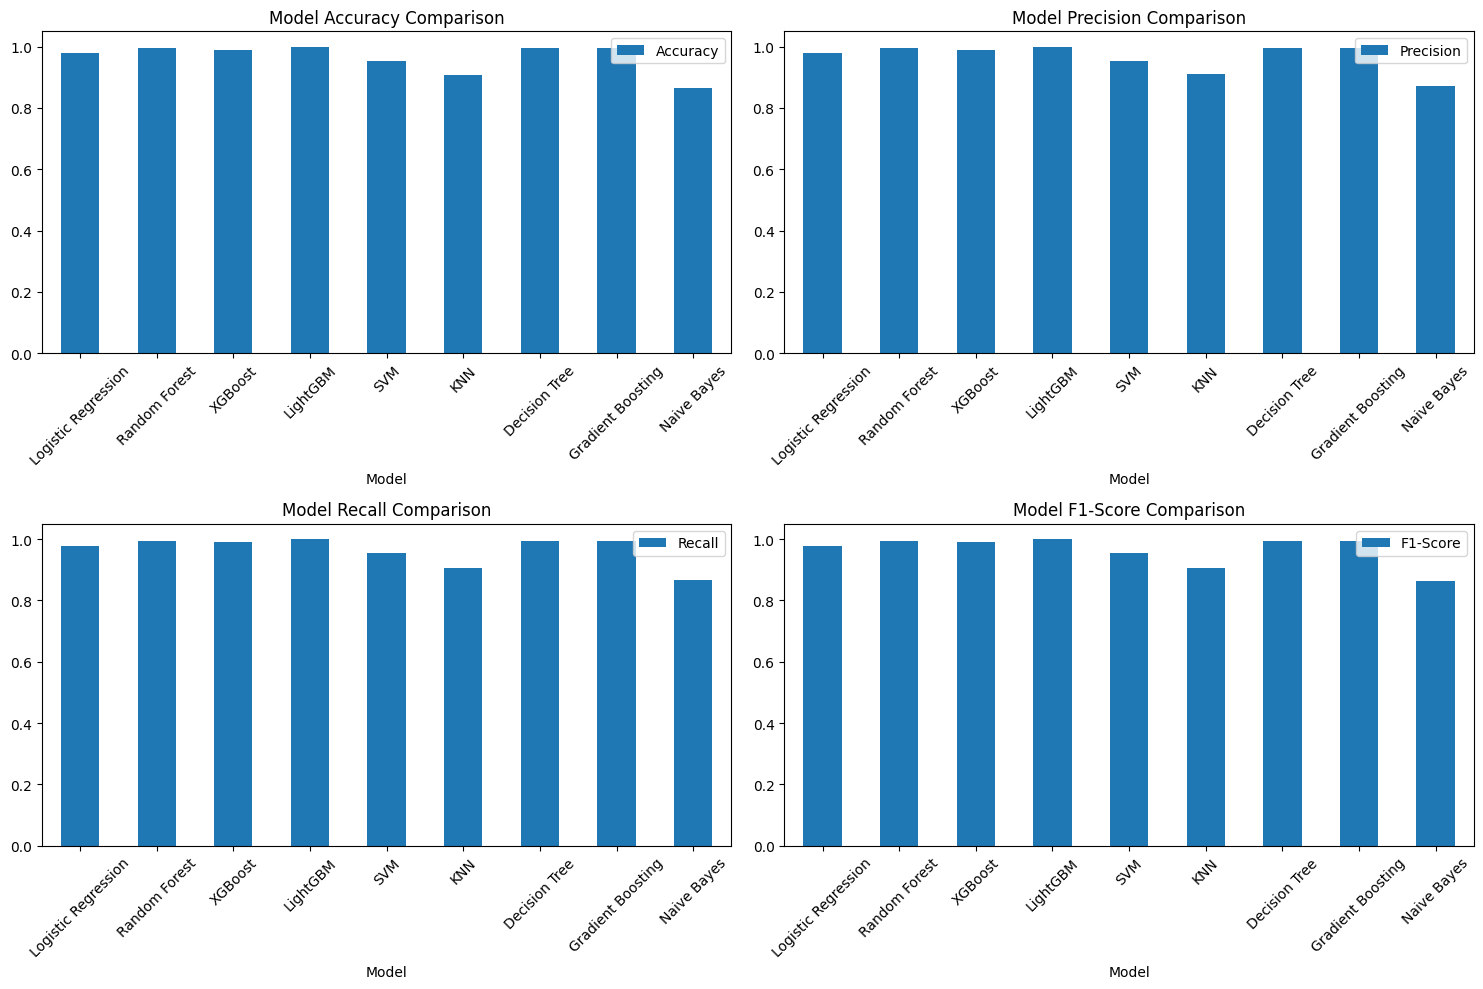

In [44]:
# Plot classification comparison
print("Generating classification comparison plots...")
evaluator.plot_classification_comparison()


Generating regression comparison plots...


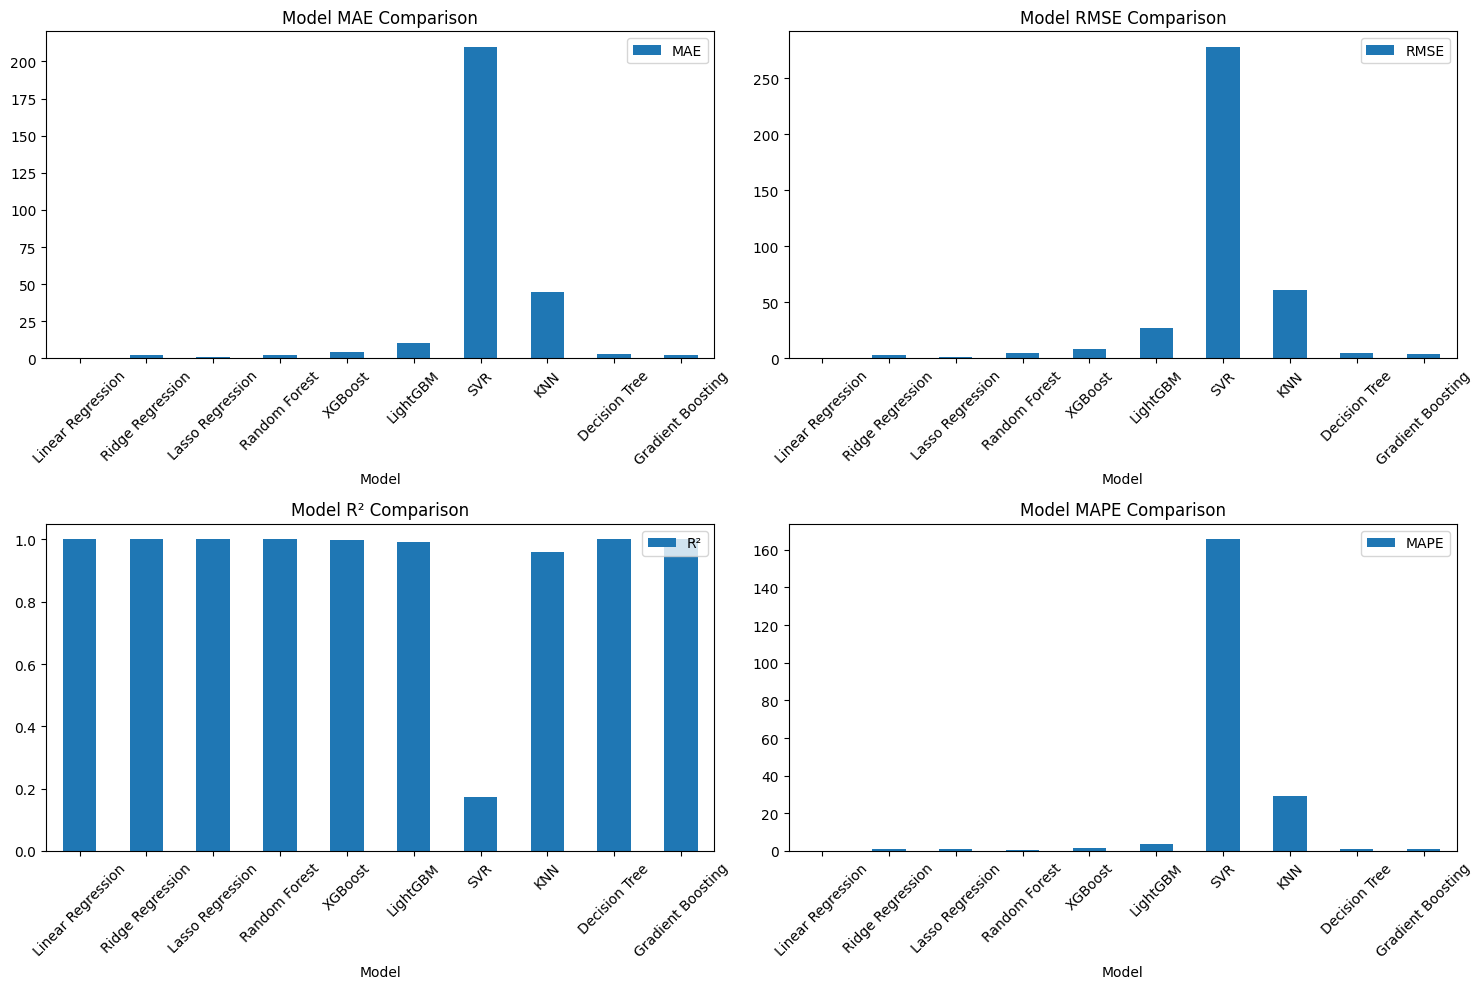

In [45]:

# Plot regression comparison
print("Generating regression comparison plots...")
evaluator.plot_regression_comparison()


Generating ROC curves...


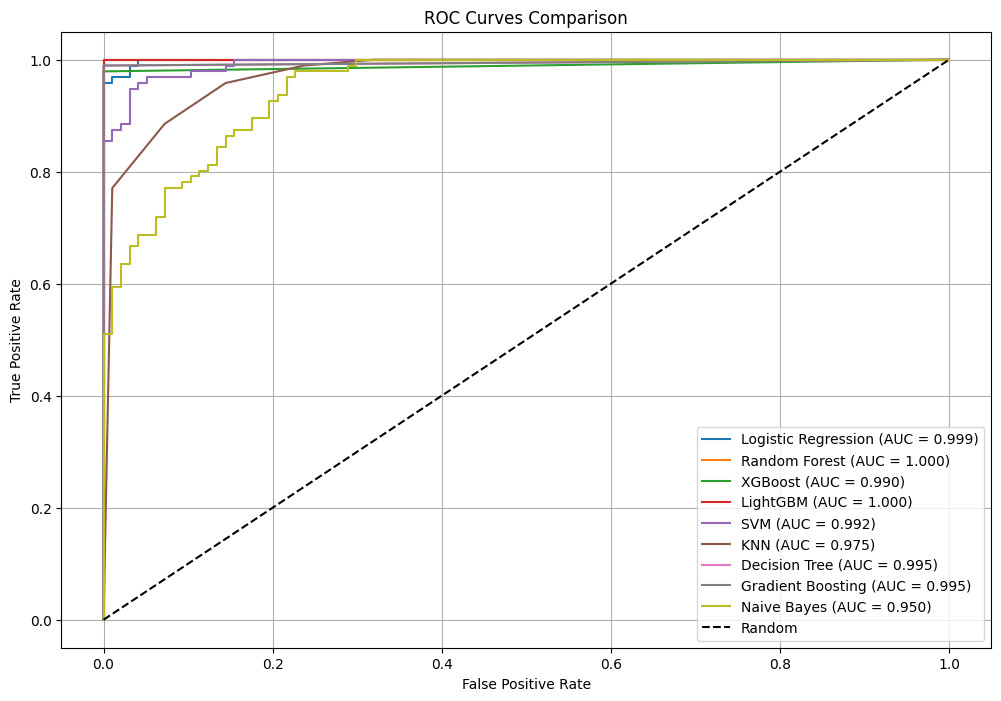

In [46]:
# Plot ROC curves for classification
print("Generating ROC curves...")
evaluator.plot_roc_curves(classification_results)

Generating prediction plots for Linear Regression...


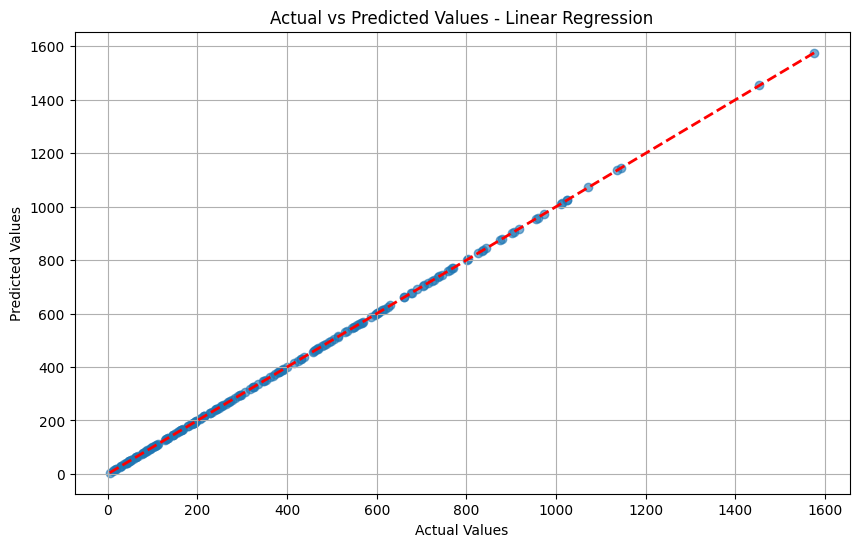

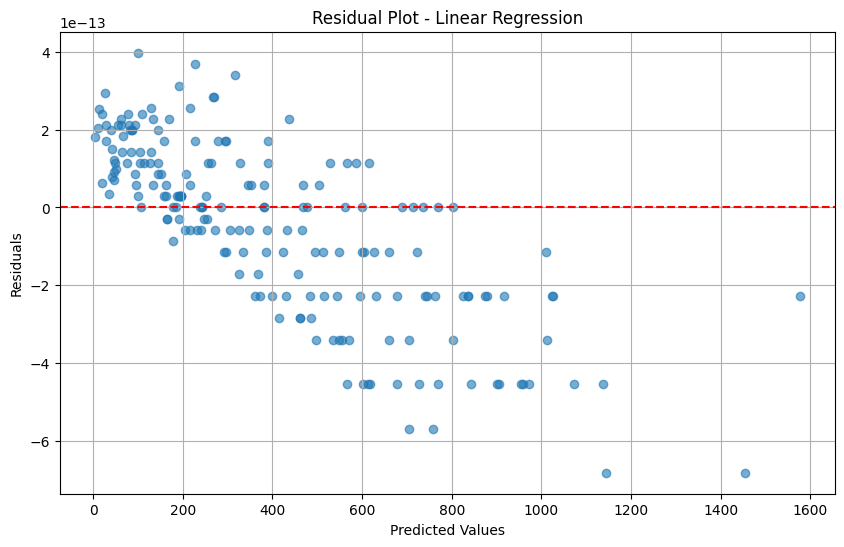

In [47]:
# Plot prediction vs actual for best regression model
print(f"Generating prediction plots for {best_reg_model}...")
evaluator.plot_prediction_vs_actual(regression_results, best_reg_model)


In [48]:
# Create comprehensive dashboard
print("Creating model comparison dashboard...")
evaluator.create_model_comparison_dashboard()

Creating model comparison dashboard...


In [49]:
# 7. Detailed Analysis of Best Models
print("\n7. DETAILED ANALYSIS OF BEST MODELS")
print("-" * 40)



7. DETAILED ANALYSIS OF BEST MODELS
----------------------------------------


In [50]:
# Classification model analysis
print(f"\n7.1 DETAILED CLASSIFICATION ANALYSIS - {best_clf_model}")
print("-" * 50)
best_clf_result = classification_results[best_clf_model]
y_test_clf = best_clf_result["y_test"]
y_pred_clf = best_clf_result["y_pred"]



7.1 DETAILED CLASSIFICATION ANALYSIS - LightGBM
--------------------------------------------------


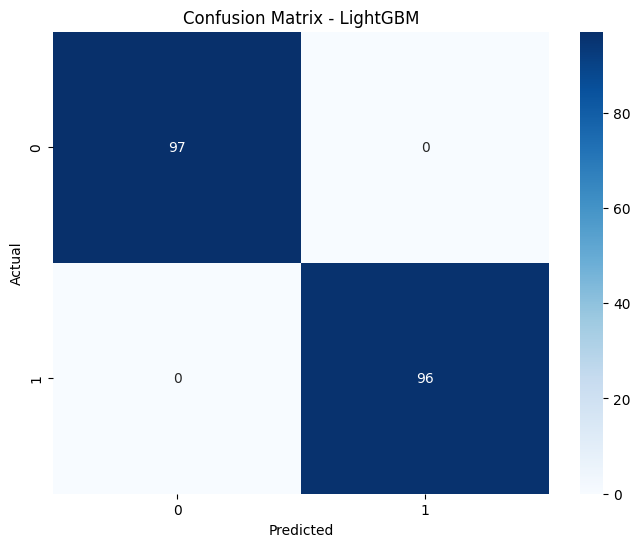

In [51]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_clf_model}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [52]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_clf))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00        96

    accuracy                           1.00       193
   macro avg       1.00      1.00      1.00       193
weighted avg       1.00      1.00      1.00       193



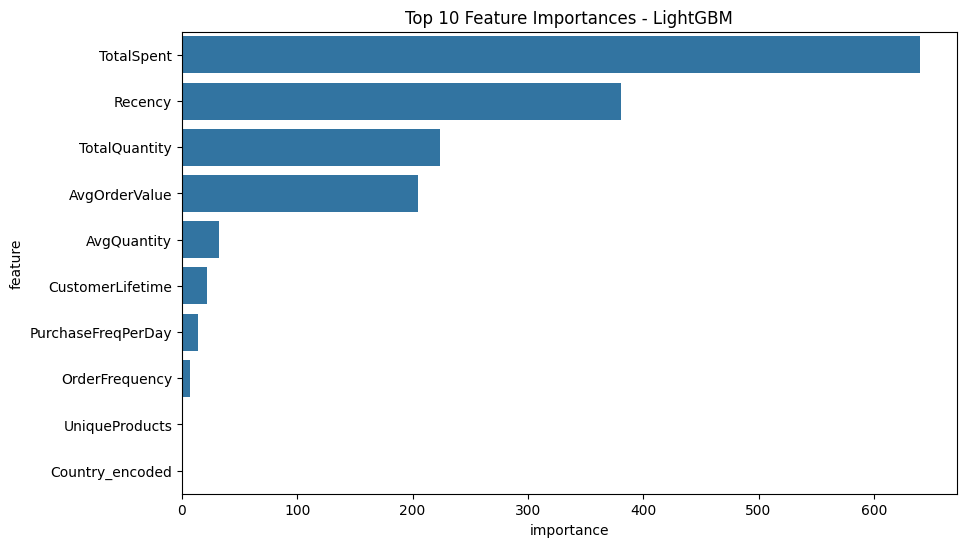

Top 10 Most Important Features:
              feature  importance
0          TotalSpent         640
5             Recency         381
3       TotalQuantity         224
1       AvgOrderValue         205
4         AvgQuantity          32
7    CustomerLifetime          22
8  PurchaseFreqPerDay          14
2      OrderFrequency           7
6      UniqueProducts           1
9     Country_encoded           0


In [53]:
# Feature Importance (if available)
if hasattr(best_clf_result["model"], "feature_importances_"):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_clf_result["model"].feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title(f'Top 10 Feature Importances - {best_clf_model}')
    plt.show()

    print("Top 10 Most Important Features:")
    print(feature_importance.head(10))

In [54]:
# Regression model analysis
print(f"\n7.2 DETAILED REGRESSION ANALYSIS - {best_reg_model}")
print("-" * 45)
best_reg_result = regression_results[best_reg_model]
y_test_reg = best_reg_result["y_test"]
y_pred_reg = best_reg_result["y_pred"]


7.2 DETAILED REGRESSION ANALYSIS - Linear Regression
---------------------------------------------


In [55]:
# Additional regression metrics
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test_reg, y_pred_reg)
print(f"Correlation coefficient: {r_value:.4f}")
print(f"P-value: {p_value:.4f}")


Correlation coefficient: 1.0000
P-value: 0.0000


In [58]:
# Feature Importance for regression (if available)
if hasattr(best_reg_result["model"], "feature_importances_"):
    feature_importance_reg = pd.DataFrame({
        'feature': X.columns,
        'importance': best_reg_result["model"].feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance_reg.head(10), x='importance', y='feature')
    plt.title(f'Top 10 Feature Importances - {best_reg_model}')
    plt.show()

    print("Top 10 Most Important Features:")
    print(feature_importance_reg.head(10))
else:
    print("Feature importance is not available for this regression model.")

Feature importance is not available for this regression model.


In [59]:
# 8. Cross-Model Comparison
print("\n8. CROSS-MODEL COMPARISON")
print("-" * 25)


8. CROSS-MODEL COMPARISON
-------------------------


In [60]:
# Create comparison summary
comparison_summary = pd.DataFrame({
    'Task': ['Classification', 'Regression'],
    'Best Model': [best_clf_model, best_reg_model],
    'Best Score': [classification_metrics['Accuracy'].max(), regression_metrics['R²'].max()],
    'Metric': ['Accuracy', 'R²']
})

print("Summary of Best Models:")
print(comparison_summary)


Summary of Best Models:
             Task         Best Model  Best Score    Metric
0  Classification           LightGBM         1.0  Accuracy
1      Regression  Linear Regression         1.0        R²


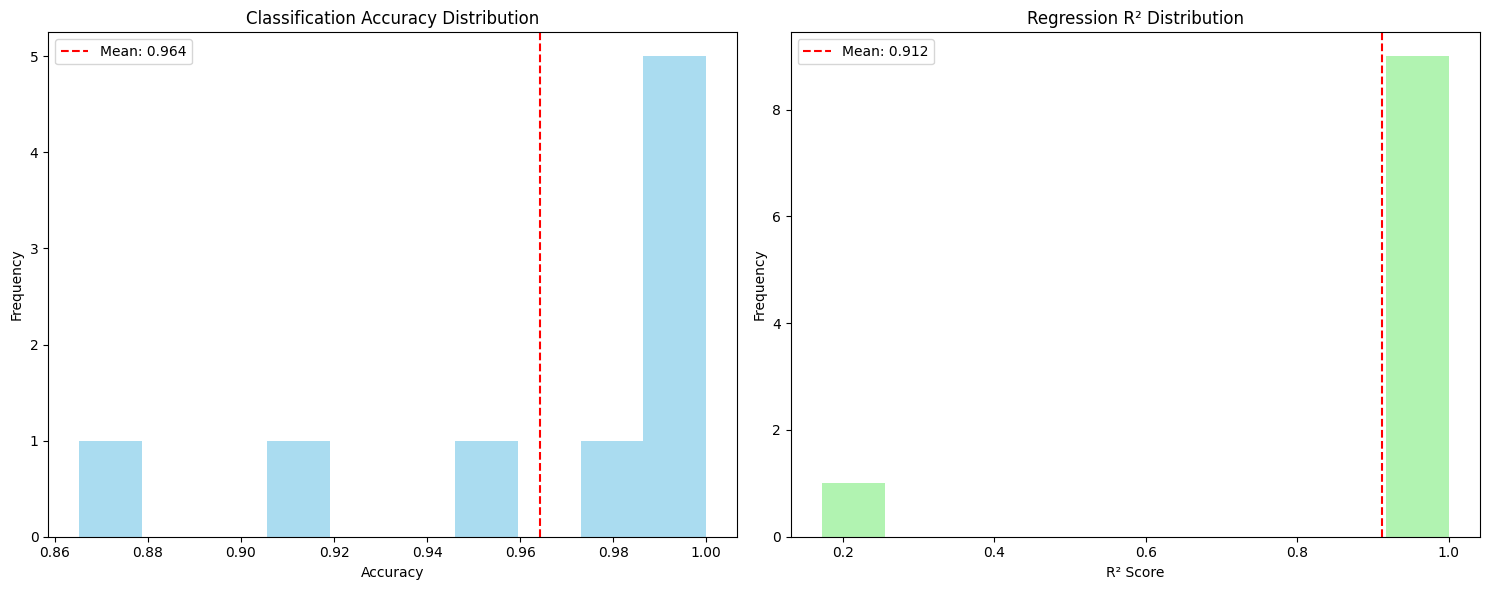

In [62]:
# Performance distribution analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Classification performance distribution
axes[0].hist(classification_metrics['Accuracy'], bins=10, alpha=0.7, color='skyblue')
axes[0].axvline(classification_metrics['Accuracy'].mean(), color='red', linestyle='--',
                label=f'Mean: {classification_metrics["Accuracy"].mean():.3f}')
axes[0].set_title('Classification Accuracy Distribution')
axes[0].set_xlabel('Accuracy')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Regression performance distribution
axes[1].hist(regression_metrics['R²'], bins=10, alpha=0.7, color='lightgreen')
axes[1].axvline(regression_metrics['R²'].mean(), color='red', linestyle='--',
                label=f'Mean: {regression_metrics["R²"].mean():.3f}')
axes[1].set_title('Regression R² Distribution')
axes[1].set_xlabel('R² Score')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()



In [63]:
# 9. Business Insights and Recommendations
print("\n9. BUSINESS INSIGHTS & RECOMMENDATIONS")
print("-" * 40)


9. BUSINESS INSIGHTS & RECOMMENDATIONS
----------------------------------------


In [64]:
# Customer segmentation insights
high_value_customers = df_agg[df_agg['TotalSpent'] > df_agg['TotalSpent'].quantile(0.8)]
print(f"High-value customers (top 20%): {len(high_value_customers)}")
print(f"Average spending of high-value customers: ${high_value_customers['TotalSpent'].mean():.2f}")


High-value customers (top 20%): 128
Average spending of high-value customers: $936.29


In [65]:
# Geographic insights
top_countries = country_stats.head(5)
print(f"\nTop 5 countries by revenue:")
for _, row in top_countries.iterrows():
    print(f"- {row['Country']}: ${row['Revenue']:,.2f}")


Top 5 countries by revenue:
- Canada: $69,786.66
- USA: $67,421.36
- Australia: $62,411.73
- UK: $61,715.37


In [66]:
# Seasonal insights
df_clean['Month'] = df_clean['Date'].dt.month
monthly_sales = df_clean.groupby('Month')['TotalAmount'].sum()
peak_month = monthly_sales.idxmax()
print(f"\nPeak sales month: {peak_month} (${monthly_sales.max():,.2f})")



Peak sales month: 12 ($26,804.98)


In [67]:
# 10. Model Deployment Recommendations
print("\n10. MODEL DEPLOYMENT RECOMMENDATIONS")
print("-" * 40)

print(f"Recommended Classification Model: {best_clf_model}")
print(f"- Use case: Predicting high-value customers")
print(f"- Expected accuracy: {classification_metrics.loc[classification_metrics['Model'] == best_clf_model, 'Accuracy'].iloc[0]:.1%}")

print(f"\nRecommended Regression Model: {best_reg_model}")
print(f"- Use case: Predicting customer lifetime value")
print(f"- Expected R² score: {regression_metrics.loc[regression_metrics['Model'] == best_reg_model, 'R²'].iloc[0]:.3f}")




10. MODEL DEPLOYMENT RECOMMENDATIONS
----------------------------------------
Recommended Classification Model: LightGBM
- Use case: Predicting high-value customers
- Expected accuracy: 100.0%

Recommended Regression Model: Linear Regression
- Use case: Predicting customer lifetime value
- Expected R² score: 1.000


In [68]:
# 11. Advanced Visualizations
print("\n11. ADVANCED VISUALIZATIONS")
print("-" * 30)



11. ADVANCED VISUALIZATIONS
------------------------------


Text(0, 0.5, 'Frequency')

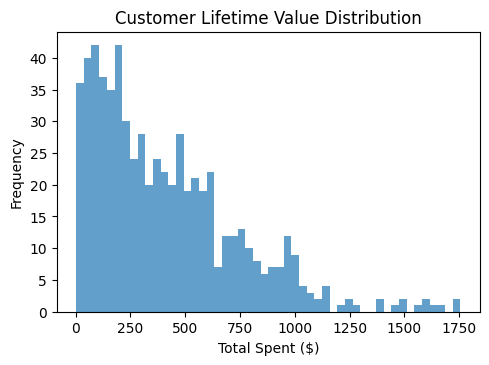

In [69]:
# Customer lifetime value distribution
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(df_agg['TotalSpent'], bins=50, alpha=0.7)
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('Total Spent ($)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Total Spent ($)')

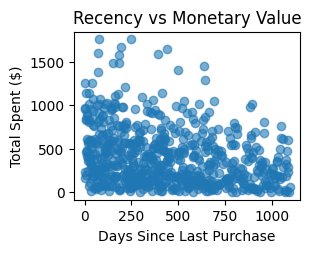

In [70]:
# Recency vs Monetary scatter plot
plt.subplot(2, 2, 2)
plt.scatter(df_agg['Recency'], df_agg['TotalSpent'], alpha=0.6)
plt.title('Recency vs Monetary Value')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Total Spent ($)')

Text(0, 0.5, 'Frequency')

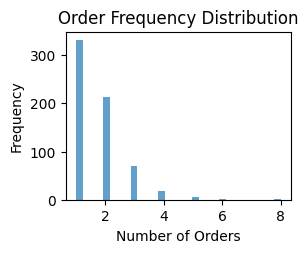

In [71]:
# Order frequency distribution
plt.subplot(2, 2, 3)
plt.hist(df_agg['OrderFrequency'], bins=30, alpha=0.7)
plt.title('Order Frequency Distribution')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')


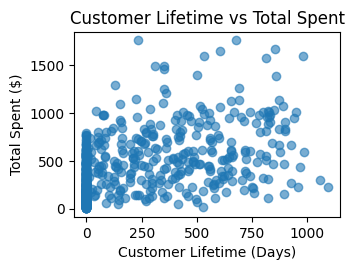

In [72]:
# Customer lifetime vs total spent
plt.subplot(2, 2, 4)
plt.scatter(df_agg['CustomerLifetime'], df_agg['TotalSpent'], alpha=0.6)
plt.title('Customer Lifetime vs Total Spent')
plt.xlabel('Customer Lifetime (Days)')
plt.ylabel('Total Spent ($)')

plt.tight_layout()
plt.show()


In [79]:
# Interactive 3D scatter plot
fig = px.scatter_3d(df_agg.sample(600), x='Recency', y='OrderFrequency', z='TotalSpent',
                    color='TotalSpent', title='3D Customer Segmentation',
                    labels={'Recency': 'Recency (Days)',
                           'OrderFrequency': 'Order Frequency',
                           'TotalSpent': 'Total Spent ($)'})
fig.show()


In [80]:
# 12. Final Summary Report
print("\n" + "="*60)
print("FINAL SUMMARY REPORT")
print("="*60)

print(f"Dataset Overview:")
print(f"- Total customers analyzed: {len(df_agg):,}")
print(f"- Total transactions: {len(df_clean):,}")
print(f"- Date range: {df_clean['Date'].min().date()} to {df_clean['Date'].max().date()}")
print(f"- Countries covered: {df_clean['Country'].nunique()}")
print(f"- Unique products: {df_clean['ProductID'].nunique():,}")

print(f"\nModel Performance Summary:")
print(f"- Best Classification Model: {best_clf_model} (Accuracy: {classification_metrics['Accuracy'].max():.1%})")
print(f"- Best Regression Model: {best_reg_model} (R²: {regression_metrics['R²'].max():.3f})")

print(f"\nBusiness Metrics:")
print(f"- Total revenue: ${df_clean['TotalAmount'].sum():,.2f}")
print(f"- Average order value: ${df_clean['TotalAmount'].mean():.2f}")
print(f"- Average customer value: ${df_agg['TotalSpent'].mean():.2f}")

print(f"\nKey Insights:")
print(f"- {(df_agg['Recency'] < 30).sum()} customers ({(df_agg['Recency'] < 30).mean():.1%}) made recent purchases")
print(f"- Top 20% of customers generate {(high_value_customers['TotalSpent'].sum() / df_agg['TotalSpent'].sum()):.1%} of total revenue")
print(f"- Peak sales month: Month {peak_month}")

print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)



FINAL SUMMARY REPORT
Dataset Overview:
- Total customers analyzed: 641
- Total transactions: 1,084
- Date range: 2022-01-01 to 2024-12-31
- Countries covered: 4
- Unique products: 49

Model Performance Summary:
- Best Classification Model: LightGBM (Accuracy: 100.0%)
- Best Regression Model: Linear Regression (R²: 1.000)

Business Metrics:
- Total revenue: $261,335.12
- Average order value: $241.08
- Average customer value: $407.70

Key Insights:
- 30 customers (4.7%) made recent purchases
- Top 20% of customers generate 45.9% of total revenue
- Peak sales month: Month 12

ANALYSIS COMPLETE


In [81]:
# Save results to files (optional)
try:
    classification_metrics.to_csv('classification_results.csv', index=False)
    regression_metrics.to_csv('regression_results.csv', index=False)
    df_agg.to_csv('customer_aggregated_data.csv', index=False)
    print("\nResults saved to CSV files:")
    print("- classification_results.csv")
    print("- regression_results.csv")
    print("- customer_aggregated_data.csv")
except Exception as e:
    print(f"Note: Could not save files - {e}")


Results saved to CSV files:
- classification_results.csv
- regression_results.csv
- customer_aggregated_data.csv
